### ex 12


In [76]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#mapear o caminho do arquivo
caminhoCompleto ='./dados-satisfação.xlsx'

dados = pd.read_excel(caminhoCompleto, sheet_name='treino')

#exibir o cabeçalho DataFrame
dados.head()

,Instituição,Comentario,Data,Classificação,Elogio quanto ao app,Reclamação quanto ao app,Elogio a Instituição,Reclamação a Instituição,Não Classificável
0,Banco do Brasil,Muito bom ajuda muito,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
1,Banco do Brasil,excelente,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
2,Banco do Brasil,Bom,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
3,Banco do Brasil,aplicativo muito top,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO
4,Banco do Brasil,Fácil e prático,2019-07-21,5,SIM,NÃO,NÃO,NÃO,NÃO


In [77]:
#substituindo os dados
dados['Elogio quanto ao app'] = dados['Elogio quanto ao app'].replace('SIM', 1)
dados['Elogio quanto ao app'] = dados['Elogio quanto ao app'].replace('NÃO', 0)
dados['Elogio quanto ao app'] = dados['Elogio quanto ao app'].replace('NAO', 0)

dados['Reclamação quanto ao app'] = dados['Reclamação quanto ao app'].replace('SIM', 1)
dados['Reclamação quanto ao app'] = dados['Reclamação quanto ao app'].replace('NÃO', 0)

dados['Elogio a Instituição'] = dados['Elogio a Instituição'].replace('SIM', 1)
dados['Elogio a Instituição'] = dados['Elogio a Instituição'].replace('NÃO', 0)

dados['Reclamação a Instituição'] = dados['Reclamação a Instituição'].replace('SIM', 1)
dados['Reclamação a Instituição'] = dados['Reclamação a Instituição'].replace('NÃO', 0)

dados['Não Classificável'] = dados['Não Classificável'].replace('SIM', 1)
dados['Não Classificável'] = dados['Não Classificável'].replace('NÃO', 0)




In [78]:
dados.info()

#converter os dados para números

dados['Elogio quanto ao app'] = dados['Elogio quanto ao app'].astype(int)
dados['Reclamação quanto ao app'] = dados['Reclamação quanto ao app'].astype(int)
dados['Elogio a Instituição'] = dados['Elogio a Instituição'].astype(int)
dados['Reclamação a Instituição'] = dados['Reclamação a Instituição'].astype(int)
dados['Não Classificável'] = dados['Não Classificável'].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   int64         
 5   Reclamação quanto ao app  8702 non-null   int64         
 6   Elogio a Instituição      8702 non-null   int64         
 7   Reclamação a Instituição  8702 non-null   int64         
 8   Não Classificável         8702 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 612.0+ KB


In [79]:
#substituindo os dados
dados['Classificação'] = dados['Classificação'].replace(2,-1)
dados['Classificação'] = dados['Classificação'].replace(1,-1)
dados['Classificação'] = dados['Classificação'].replace(5,1)
dados['Classificação'] = dados['Classificação'].replace(4,1)
dados['Classificação'] = dados['Classificação'].replace(3,0)



<Axes: xlabel='Instituição', ylabel='Classificação'>

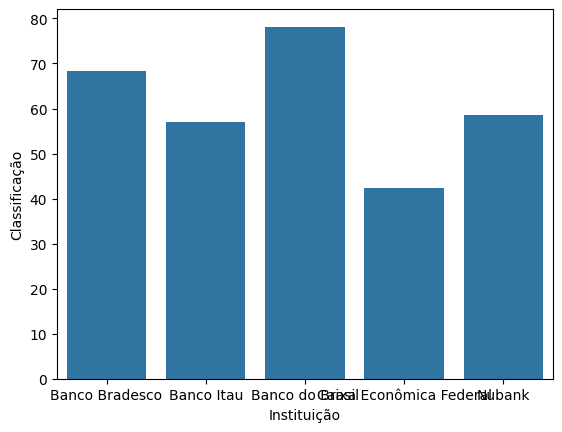

In [80]:
#calcular a média  de classificação por instituição
df_classificacao = dados.groupby(['Instituição'])['Classificação'].agg('mean').reset_index()
df_classificacao['Classificação'] = df_classificacao['Classificação'] *100


#criar Grafico
sns.barplot(x= df_classificacao['Instituição'], y = df_classificacao['Classificação'])
